In [23]:
import torch
import torchvision

In [24]:
n_epochs = 3
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

In [25]:
traindataset = torchvision.datasets.ImageFolder('~/Downloads/Converted2/Train', transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ]))
testdataset = torchvision.datasets.ImageFolder('~/Downloads/Converted2/Test',transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ]))

train_loader = torch.utils.data.DataLoader(
    traindataset,
    batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
    testdataset,
    batch_size=batch_size_test, shuffle=True)

In [26]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)




In [27]:
example_data.shape

torch.Size([1000, 3, 34, 34])

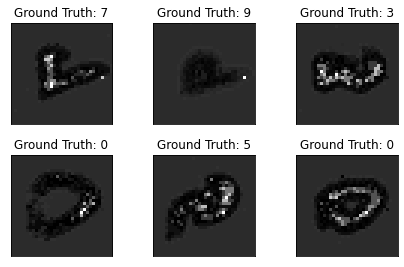

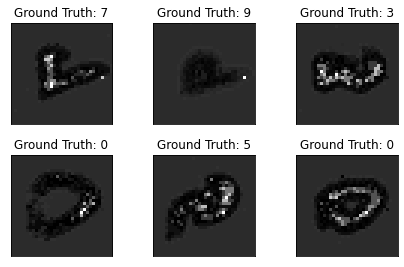

In [28]:
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
fig





In [29]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [9]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(500, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 500)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

In [10]:
network = Net()
optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                      momentum=momentum)

In [11]:
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

In [12]:
def train(epoch):
  network.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = network(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
      train_losses.append(loss.item())
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
      torch.save(network.state_dict(), './results/model.pth')
      torch.save(optimizer.state_dict(), './results/optimizer.pth')

In [13]:
def test():
  network.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = network(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

In [14]:
test()
for epoch in range(1, n_epochs + 1):
  train(epoch)
  test()

/var/folders/x1/3x4xmsg90zl0_86zz3zvpt500000gn/T/ipykernel_6704/3570626485.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/kilianhaefeli/ETH/P&S/spikingneuralnetworks/snn/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: 2.3090, Accuracy: 893/9330 (10%)

Train Epoch: 1 [0/58426 (0%)]	Loss: 2.322178
Train Epoch: 1 [640/58426 (1%)]	Loss: 2.313102
Train Epoch: 1 [1280/58426 (2%)]	Loss: 2.315763
Train Epoch: 1 [1920/58426 (3%)]	Loss: 2.289742
Train Epoch: 1 [2560/58426 (4%)]	Loss: 2.259511
Train Epoch: 1 [3200/58426 (5%)]	Loss: 2.305714
Train Epoch: 1 [3840/58426 (7%)]	Loss: 2.304691
Train Epoch: 1 [4480/58426 (8%)]	Loss: 2.263310
Train Epoch: 1 [5120/58426 (9%)]	Loss: 2.209951
Train Epoch: 1 [5760/58426 (10%)]	Loss: 2.238112
Train Epoch: 1 [6400/58426 (11%)]	Loss: 2.208723
Train Epoch: 1 [7040/58426 (12%)]	Loss: 2.221834
Train Epoch: 1 [7680/58426 (13%)]	Loss: 2.119652
Train Epoch: 1 [8320/58426 (14%)]	Loss: 2.044283
Train Epoch: 1 [8960/58426 (15%)]	Loss: 1.933968
Train Epoch: 1 [9600/58426 (16%)]	Loss: 1.934507
Train Epoch: 1 [10240/58426 (18%)]	Loss: 1.957265
Train Epoch: 1 [10880/58426 (19%)]	Loss: 1.969133
Train Epoch: 1 [11520/58426 (20%)]	Loss: 1.872045
Train Epoch: 1 [12160/5

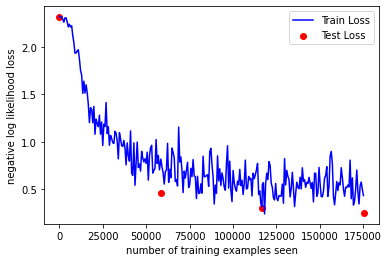

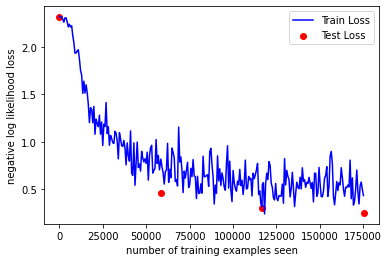

In [16]:
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
fig

In [17]:
with torch.no_grad():
  output = network(example_data)

/var/folders/x1/3x4xmsg90zl0_86zz3zvpt500000gn/T/ipykernel_6704/3570626485.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


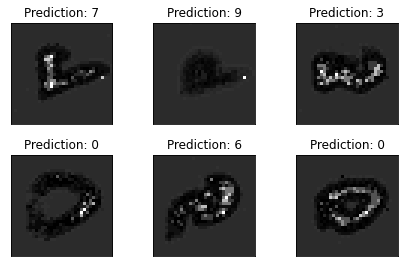

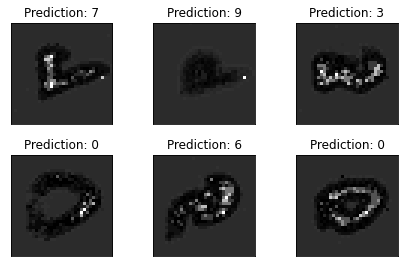

In [18]:
fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Prediction: {}".format(
    output.data.max(1, keepdim=True)[1][i].item()))
  plt.xticks([])
  plt.yticks([])
fig

In [19]:
continued_network = Net()
continued_optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                                momentum=momentum)

In [20]:
network_state_dict = torch.load('./results/model.pth')
continued_network.load_state_dict(network_state_dict)

optimizer_state_dict = torch.load('./results/optimizer.pth')
continued_optimizer.load_state_dict(optimizer_state_dict)

In [21]:
for i in range(4,9):
  test_counter.append(i*len(train_loader.dataset))
  train(i)
  test()

/var/folders/x1/3x4xmsg90zl0_86zz3zvpt500000gn/T/ipykernel_6704/3570626485.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 4 [0/58426 (0%)]	Loss: 0.403765
Train Epoch: 4 [640/58426 (1%)]	Loss: 0.476471
Train Epoch: 4 [1280/58426 (2%)]	Loss: 0.315554
Train Epoch: 4 [1920/58426 (3%)]	Loss: 0.524224
Train Epoch: 4 [2560/58426 (4%)]	Loss: 0.377654
Train Epoch: 4 [3200/58426 (5%)]	Loss: 0.462883
Train Epoch: 4 [3840/58426 (7%)]	Loss: 0.325629
Train Epoch: 4 [4480/58426 (8%)]	Loss: 0.658104
Train Epoch: 4 [5120/58426 (9%)]	Loss: 0.394410
Train Epoch: 4 [5760/58426 (10%)]	Loss: 0.565883
Train Epoch: 4 [6400/58426 (11%)]	Loss: 0.595877
Train Epoch: 4 [7040/58426 (12%)]	Loss: 0.454293
Train Epoch: 4 [7680/58426 (13%)]	Loss: 0.767978
Train Epoch: 4 [8320/58426 (14%)]	Loss: 0.470317
Train Epoch: 4 [8960/58426 (15%)]	Loss: 0.530472
Train Epoch: 4 [9600/58426 (16%)]	Loss: 0.483738
Train Epoch: 4 [10240/58426 (18%)]	Loss: 0.397393
Train Epoch: 4 [10880/58426 (19%)]	Loss: 0.568426
Train Epoch: 4 [11520/58426 (20%)]	Loss: 0.612939
Train Epoch: 4 [12160/58426 (21%)]	Loss: 0.341720
Train Epoch: 4 [12800/58426 (

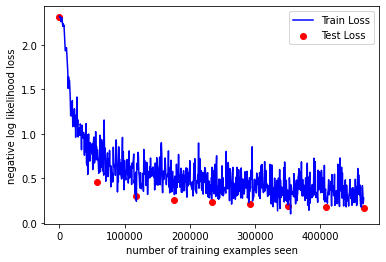

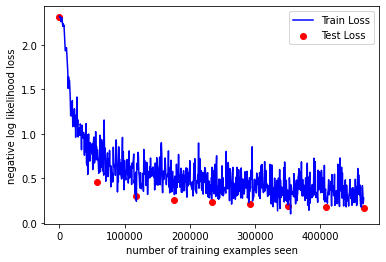

In [22]:
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
fig